<a href="https://colab.research.google.com/github/gilbertfs/Final-Task---Kalbe-x-Rakamin/blob/main/Final_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#Membaca Data
df_c = pd.read_csv ("/content/Case Study - Customer.csv")
df_p = pd.read_csv ("/content/Case Study - Product.csv")
df_s = pd.read_csv ("/content/Case Study - Store.csv")
df_t = pd.read_csv ("/content/Case Study - Transaction.csv")

In [ ]:
#Library
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from yellowbrick.cluster import KElbowVisualizer
from itertools import product

In [ ]:
df_c.head()

In [ ]:
df_p.head()

In [ ]:
df_s.head()

In [ ]:
df_t.head()

In [ ]:
#Menggabungkan Data
df1 = pd.merge(df_c, df_t, on='CustomerID', how='inner')
df2 = pd.merge(df1, df_s, on = 'StoreID', how = 'inner')
df_merged = pd.merge(df2, df_p, on = 'ProductID', how = 'inner')
df_merged.head()

In [ ]:
#Menghitung Jumlah Null
df_merged.isna().sum()

In [ ]:
#Menghitung Data Duplikat
df_merged.duplicated().sum()

In [ ]:
#Missing Values
df_merged.dropna(inplace = True)
df_merged.isna().sum()

In [ ]:
df_merged.Date

In [ ]:
df_reg = df_merged.groupby('Date').agg({'Qty':'sum'})
df_reg

In [ ]:
#Time Regression Analysis
df_regression = df_merged.groupby('Date').agg({'Qty':'sum'})
df_regression.plot(figsize=(10,3))

(365, 1)
(310, 1) (55, 1)


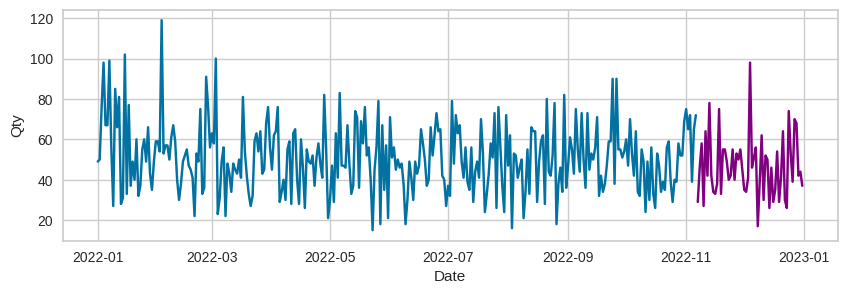

In [ ]:
#Split Data
#Split Data Train & Data Test
print(df_regression.shape)
test_size = round(df_regression.shape[0] * 0.15)
train=df_regression.iloc[:-1*(test_size)]
test=df_regression.iloc[-1*(test_size):]
print(train.shape,test.shape)

plt.figure(figsize=(10,3))
sns.lineplot(data=train, x=train.index, y=train['Qty'])
sns.lineplot(data=test, color="purple", x=test.index, y=test['Qty'])
plt.show()



In [43]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df_reg)

1. ADF :  -19.018782802299725
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 364
5. Critical Values :
	 1% :  -3.4484434475193777
	 5% :  -2.869513170510808
	 10% :  -2.571017574266393


In [ ]:
#ARIMA
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

In [38]:
from itertools import product
# Membuat list untuk a,b,c
a = range(0, 4)  # 0-3
b = range(0, 4)  # 0-3
c = range(0, 4)  # 0-3
# Fungsi dari itertools untuk membuat kombinasi a,b dan c
abc = list(product(a, b, c))
print(abc)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 0), (3, 3, 1), (3, 3, 2), (3, 3, 3)]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# List Menyimpan Score
aic_scores = []
# Grid manual untuk menemukan a,b,c yang optimal
for param in abc:
    # Melakukan fitting ARIMA model
    model = ARIMA(df_reg, order=param)
    model_fit = model.fit()
    # Menambahkan aic score ke list
    aic_scores.append({'par': param, 'aic': model_fit.aic})

# AIC score terkecil
best_aic = min(aic_scores, key=lambda x: x['aic'])
print(best_aic)

In [45]:
#HyperParameter
model_hyper = ARIMA(train, order=best_aic['par'])
model_fit_hyper = model_hyper.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [47]:
#Trial and Error
model_manual = ARIMA(train, order=(40,2,2))
model_fit_manual = model_manual.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

<ipython-input-48-7f2c5f1b07a2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['forecast_manual'] = [None]*(len(df_plot)-len(forecast_manual)) + list(forecast_manual)
<ipython-input-48-7f2c5f1b07a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['forecast_hyper'] = [None]*(len(df_plot)-len(forecast_hyper)) + list(forecast_hyper)
<ipython-input-48-7f2c5f1b07a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

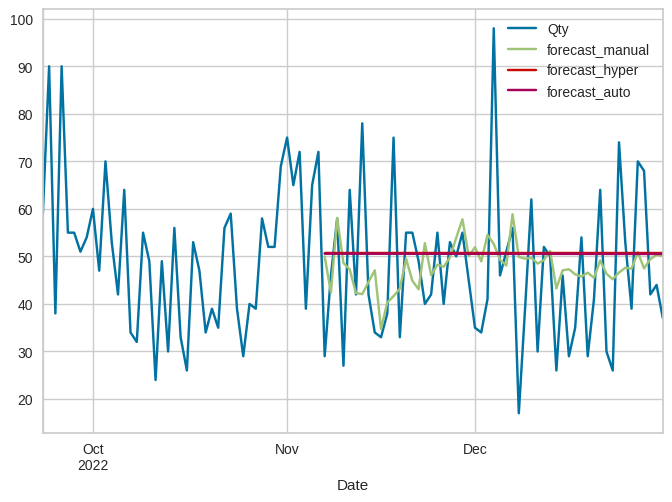

In [48]:
#Forecasting
forecast_manual = model_fit_manual.forecast(len(test))
forecast_hyper = model_fit_hyper.forecast(len(test))
forecast_auto = auto_arima.predict(len(test))

df_plot = df_reg.iloc[-100:]

df_plot['forecast_manual'] = [None]*(len(df_plot)-len(forecast_manual)) + list(forecast_manual)
df_plot['forecast_hyper'] = [None]*(len(df_plot)-len(forecast_hyper)) + list(forecast_hyper)
df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)

df_plot.plot()
plt.show()

In [49]:
#Apply model to forecast data
model = ARIMA(df_reg, order=(40, 2, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=31)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [50]:
df_reg
forecast

2023-01-01    55.501012
2023-01-02    46.128457
2023-01-03    48.190521
2023-01-04    51.436536
2023-01-05    44.279388
2023-01-06    35.718694
2023-01-07    46.271420
2023-01-08    36.689212
2023-01-09    44.674638
2023-01-10    53.109166
2023-01-11    39.216376
2023-01-12    41.436900
2023-01-13    44.810213
2023-01-14    37.333353
2023-01-15    43.425114
2023-01-16    45.393746
2023-01-17    44.394025
2023-01-18    51.934355
2023-01-19    40.556619
2023-01-20    40.703807
2023-01-21    51.921130
2023-01-22    37.457004
2023-01-23    40.450775
2023-01-24    55.729319
2023-01-25    47.500024
2023-01-26    41.865584
2023-01-27    51.280622
2023-01-28    41.104609
2023-01-29    42.439805
2023-01-30    47.640391
2023-01-31    46.101425
Freq: D, Name: predicted_mean, dtype: float64

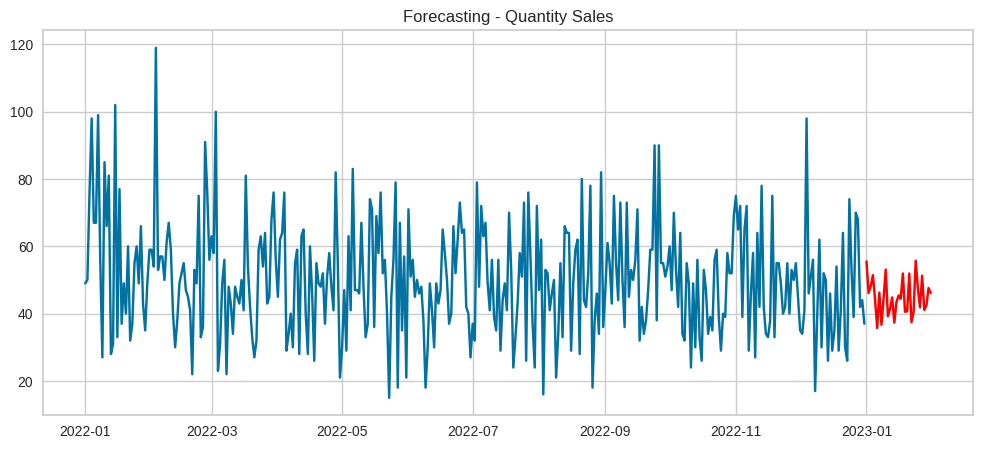

In [51]:
#Visualize Plot forecasting
plt.figure(figsize=(12,5))
plt.plot(df_reg)
plt.plot(forecast,color='red')
plt.title('Forecasting - Quantity Sales')
plt.show()

In [52]:
forecast.describe()

count    31.000000
mean     44.990137
std       5.497446
min      35.718694
25%      40.904208
50%      44.674638
75%      47.915456
max      55.729319
Name: predicted_mean, dtype: float64

In [53]:
#Clustering
df_merged.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,1,55,1,Married,512,TR54475,2022-02-23,P8,16000,1,16000,9,Lingga,Lingga,Modern Trade,-3654703,128190643,Oat,16000
1,5,58,1,Married,357,TR53643,2022-05-22,P8,16000,3,48000,9,Lingga,Lingga,Modern Trade,-3654703,128190643,Oat,16000
2,7,31,0,Married,457,TR5151,2022-10-03,P8,16000,2,32000,9,Lingga,Lingga,Modern Trade,-3654703,128190643,Oat,16000
3,19,24,1,Single,414,TR98635,2022-06-18,P8,16000,1,16000,9,Lingga,Lingga,Modern Trade,-3654703,128190643,Oat,16000
4,28,55,0,Married,608,TR9420,2022-12-01,P8,16000,3,48000,9,Lingga,Lingga,Modern Trade,-3654703,128190643,Oat,16000


In [54]:
df_preclustering = df_merged.groupby('CustomerID').agg({'TransactionID':'count',
                                                   'Qty':'sum',
                                                   'TotalAmount':'sum'}).reset_index()
df_preclustering

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [57]:
df_clustering = df_preclustering.drop(columns = ['CustomerID'])
df_clustering.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [59]:
df_clustering.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [63]:
#Standarization
X = df_clustering.values
X_standar = StandardScaler().fit_transform(X)
df_standar = pd.DataFrame(data=X_standar,columns=df_clustering.columns)
df_standar.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [64]:
#Normalisasi Min-maxscaler
X_norm = MinMaxScaler().fit_transform(X)
X_norm

array([[0.77777778, 0.72463768, 0.70394911],
       [0.55555556, 0.68115942, 0.39782666],
       [0.66666667, 0.66666667, 0.46925523],
       ...,
       [0.83333333, 0.84057971, 0.6561092 ],
       [0.44444444, 0.46376812, 0.43890803],
       [0.55555556, 0.46376812, 0.46011132]])

In [65]:
# Normalisasi sklearn
X_norm2 = preprocessing.normalize(df_clustering)
X_norm2

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [66]:
df_standar

,TransactionID,Qty,TotalAmount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347
...,...,...,...
442,1.471333,1.418049,0.984681
443,2.088298,1.653484,1.728488
444,2.088298,2.124352,1.804796
445,-0.071082,0.083921,0.488275


In [68]:
wcss= []
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model1.fit(X_standar)
    wcss.append(model1.inertia_)
print(wcss)

[1340.9999999999995, 543.253972384633, 316.9683275120808, 238.55313216419233, 192.1671315298162, 169.8741516887888, 153.94605413916025, 142.9469716083231, 130.05661291812666, 122.92379274303215]


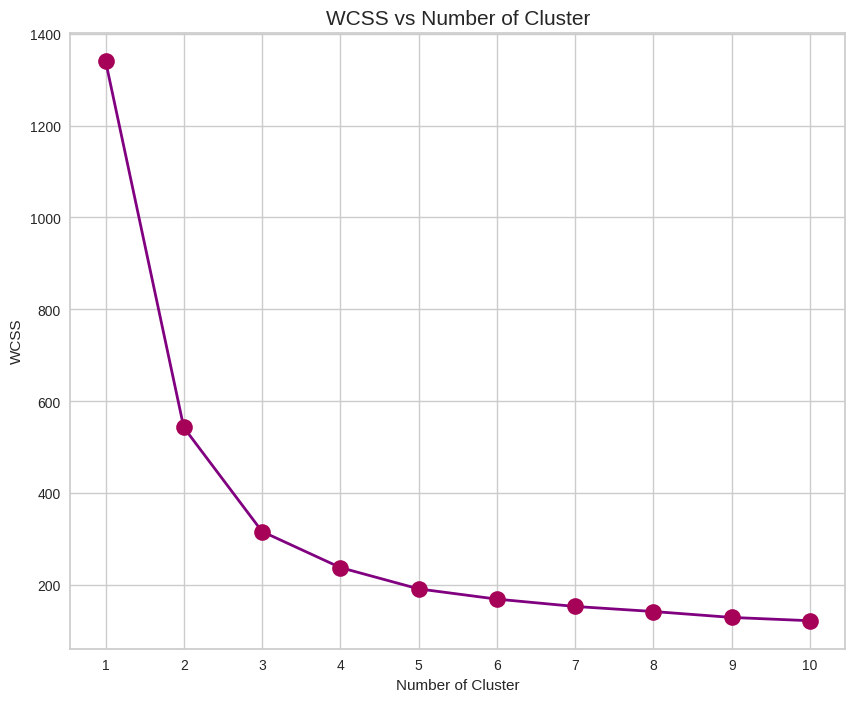

In [70]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,11)), wcss, color = 'purple', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'm',
         markeredgecolor= 'm')
plt.title('WCSS vs Number of Cluster', fontsize = 15)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.show()

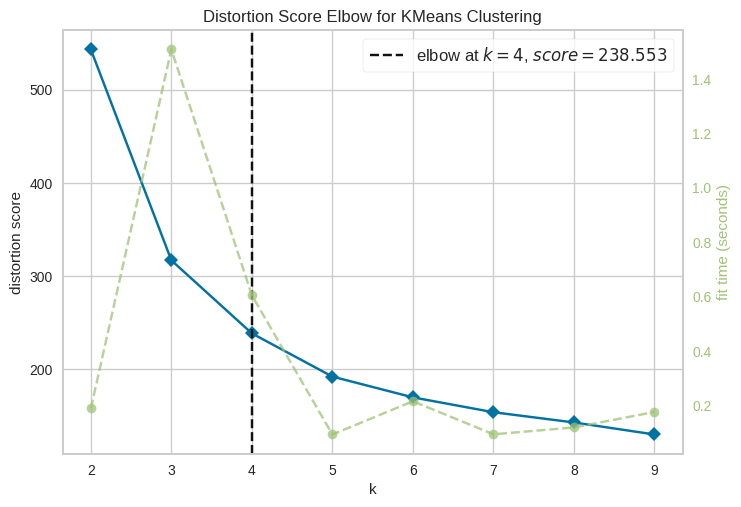

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
#Elbow Method with yellowbrick]
visualizer = KElbowVisualizer(model1, k=(2,10))
visualizer.fit(X_standar)
visualizer.show()

<Axes: >

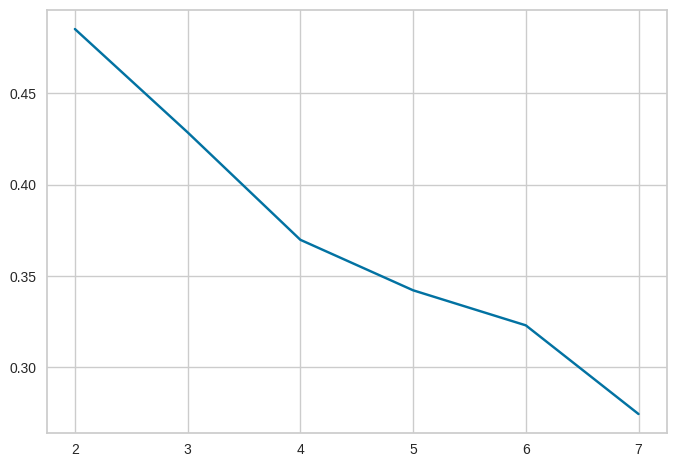

In [74]:
K = range(2,8)
fits=[]
score=[]

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init= 'auto').fit(X_standar)
    fits.append(model)
    score.append(silhouette_score(X_standar, model.labels_, metric='euclidean'))

sns.lineplot(x = K, y = score)

In [75]:
#Clustering Kmeans
kmeans_4 = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=100)
kmeans_4.fit(X_standar)

KMeans(n_clusters=4, n_init=10, random_state=100)

In [76]:
# Masukin cluster ke dataset
df_clustering['cluster'] = kmeans_4.labels_
df_clustering.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,3
1,13,57,392300,1
2,15,56,446200,1
3,10,46,302500,0
4,7,27,268600,2


<Figure size 600x600 with 0 Axes>

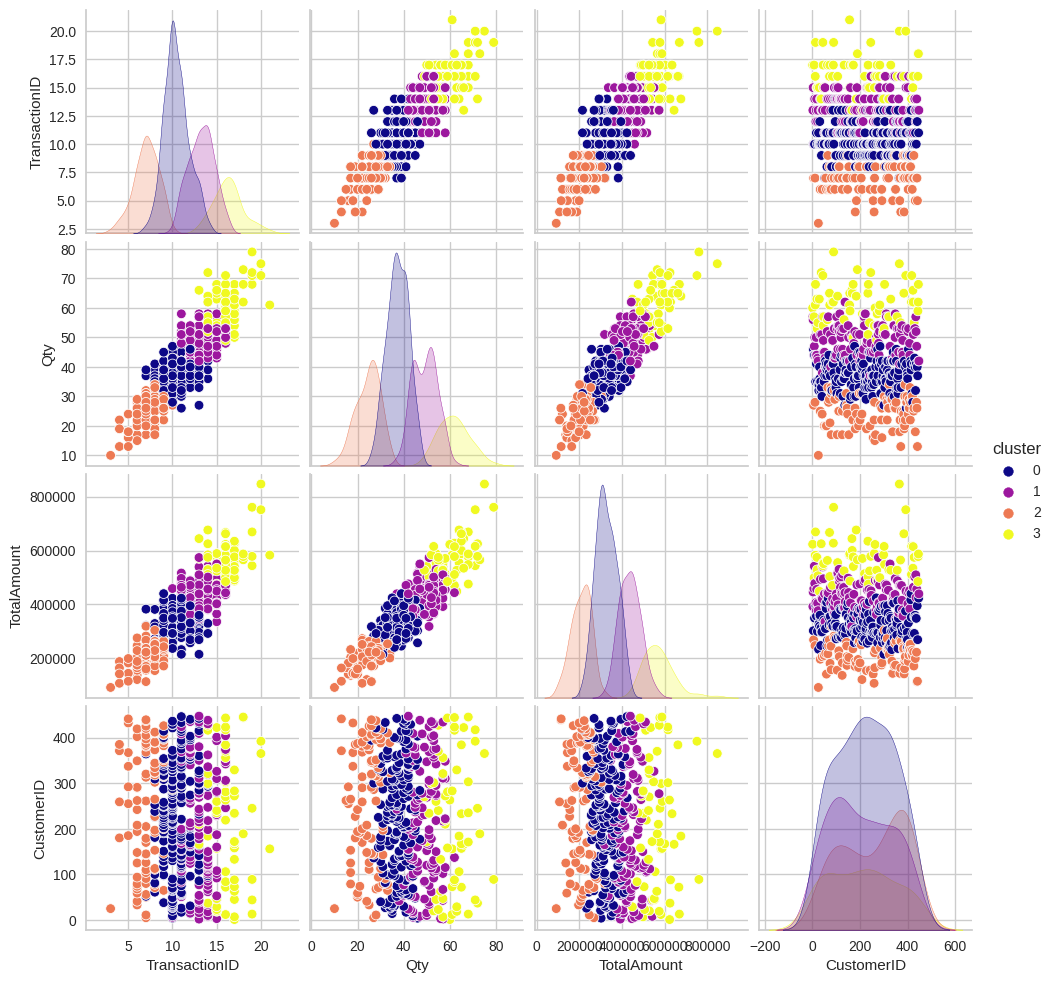

In [82]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_clustering,hue='cluster',palette='plasma')
plt.show()

In [81]:
df_clustering['CustomerID'] = df_preclustering['CustomerID']
df_clustering_mean = df_clustering.groupby('cluster').agg({'CustomerID':'count','TransactionID':'mean','Qty':'mean','TotalAmount':'mean'})
df_clustering_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
0,180,10.427778,37.350000,325663.333333
1,114,13.254386,49.078947,436203.508772
2,93,7.021505,24.505376,208283.870968
3,60,16.316667,61.650000,572100.000000
